In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from vit import ViT
from dataset import ImageNetDataset
import matplotlib.pyplot as plt
import torchvision.transforms.v2 as vT

In [9]:
root_dir = '/data/group_data/neuroagents_lab/training_datasets/imagenet_raw/train'
ds = ImageNetDataset(root_dir, 'imagenet_train_paths.pkl')

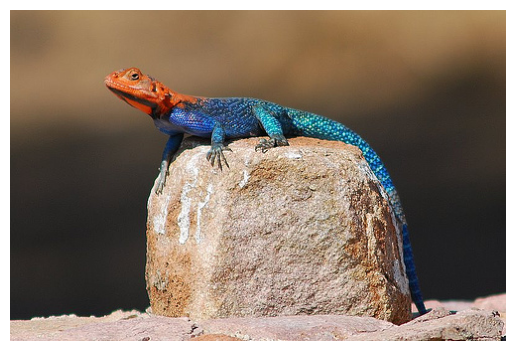

In [17]:
# Show 1 random image
idx = 300000
img = ds[idx].to('cuda')
plt.imshow(img.permute(1, 2, 0).cpu())
plt.axis('off')
plt.show()


In [18]:
transform = vT.Compose(
    [
        vT.Resize(256),
        vT.CenterCrop(256),
        vT.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

In [19]:
img = transform(img / 255.0)

In [20]:
img.min(), img.max()

(tensor(-2.1125, device='cuda:0'), tensor(2.6271, device='cuda:0'))

In [21]:
v = ViT(out_dim=64).to('cuda')

In [5]:
x = torch.rand(32, 3, 256, 256).to('cuda')

In [6]:
y = v(x)